# Name: Durjendra Kumar

# Task 4: Exploratory Data Analysis- Terrorism

# GRIP@TheSparkFoundation- Data Science and Buisness Analytics- October2022

# Objective

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a Security/Defence analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

# Import all required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import signal 
from wordcloud import WordCloud 
import seaborn as sns

# Reading the data

In [2]:
dataset=pd.read_csv("C:/Users/91761/Desktop/csv1/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1') 
print("Data Import Successfully") 
dataset.head(10)

C:\Users\91761\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data Import Successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.shape

(181691, 135)

# Checking missing value

In [6]:
dataset.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# Checking the duplicates value

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [9]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Rename the columns

In [10]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state', 'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed', 'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [11]:
dataset=dataset[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed', 'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [12]:
dataset["Country"].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [13]:
dataset["AttackType"].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [14]:
dataset["Motive"].unique()

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.',
       'The specific motive is unknown; however, sources noted that the targeted building housed migrants.',
       'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.'],
      dtype=object)

In [15]:
dataset["Weapon_type"].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

# Destructive Features of Data

In [16]:
print("Country with the most attacks:",dataset['Country'].value_counts().idxmax()) 
print("City with the most attacks:",dataset['city'].value_counts().index[1]) 
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax()) 
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax()) 
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax()) 
print("Group with the most attacks:",dataset['Group'].value_counts().index[1]) 
print("Most Attack Types:",dataset['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


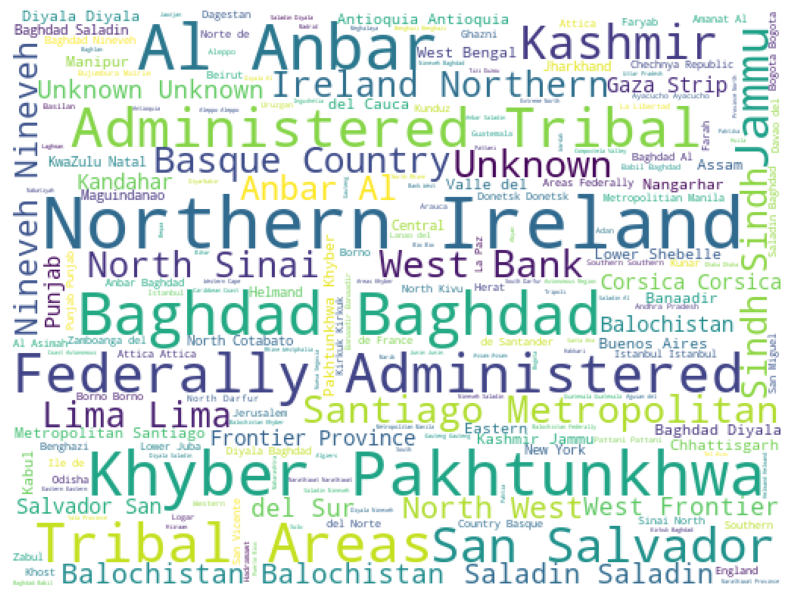

In [17]:
cities = dataset.state.dropna(False) 
plt.subplots(figsize=(10,8)) 
wordcloud = WordCloud(background_color = 'white', width = 512, height = 384).generate(' '.join(cities)) 
plt.axis('off') 
plt.imshow(wordcloud) 
plt.show()

# Data Visualization


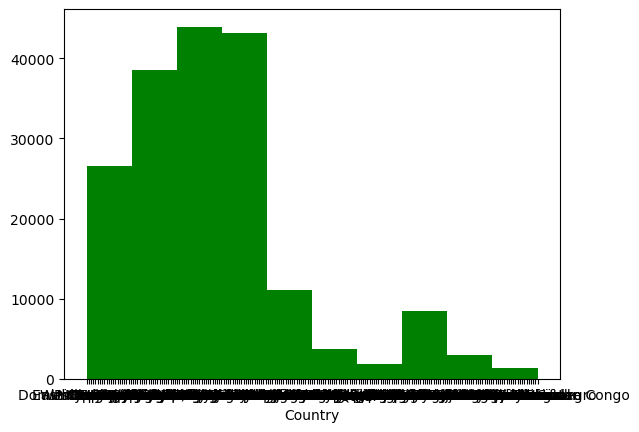

In [18]:
plt.hist(dataset['Country'],color="green") 
plt.xlabel("Country") 
plt.show()

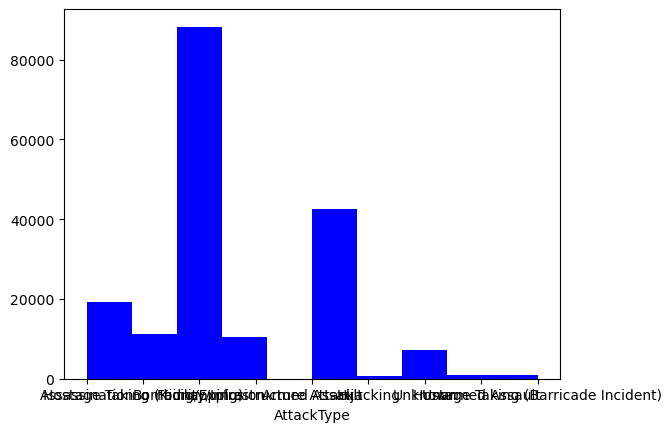

In [19]:
plt.hist(dataset['AttackType'],color="blue") 
plt.xlabel("AttackType") 
plt.show()

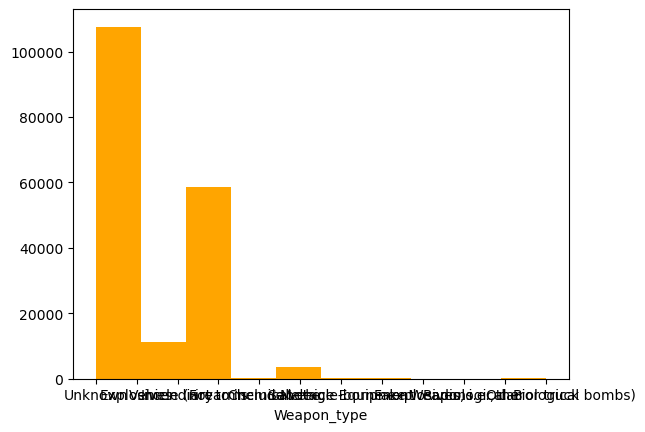

In [20]:
plt.hist(dataset['Weapon_type'],color="orange") 
plt.xlabel("Weapon_type") 
plt.show()

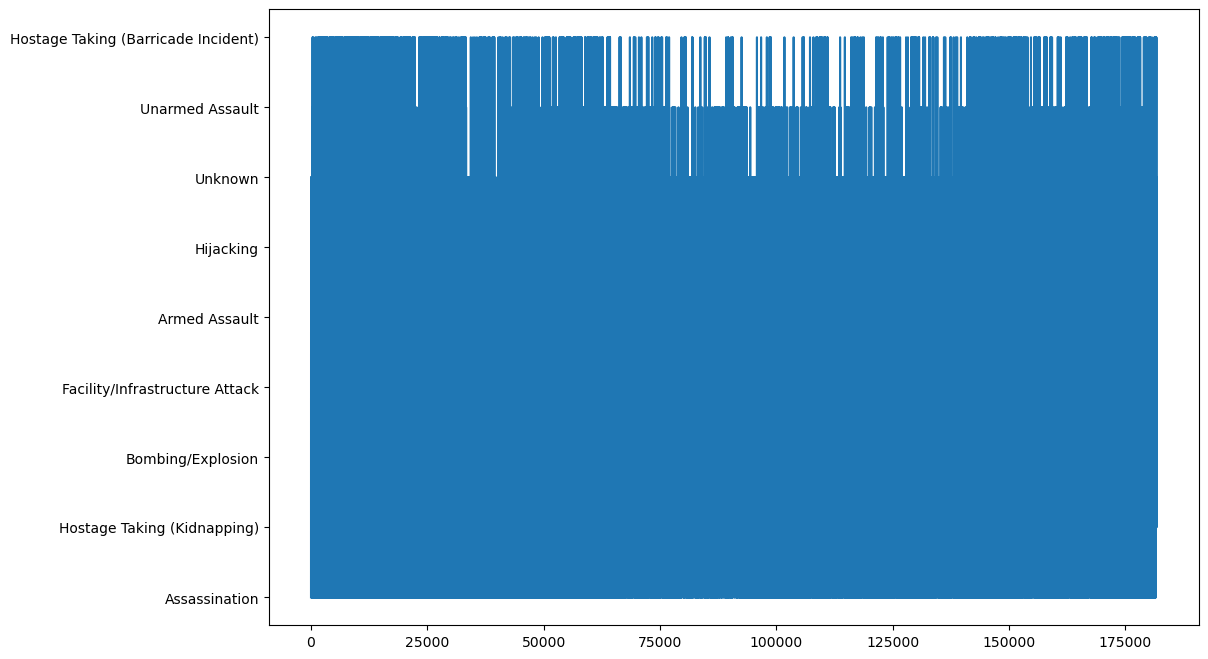

In [21]:
plt.figure(figsize=(12,8)) 
plt.plot(dataset['AttackType']) 
plt.show()

In [22]:
dataset['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

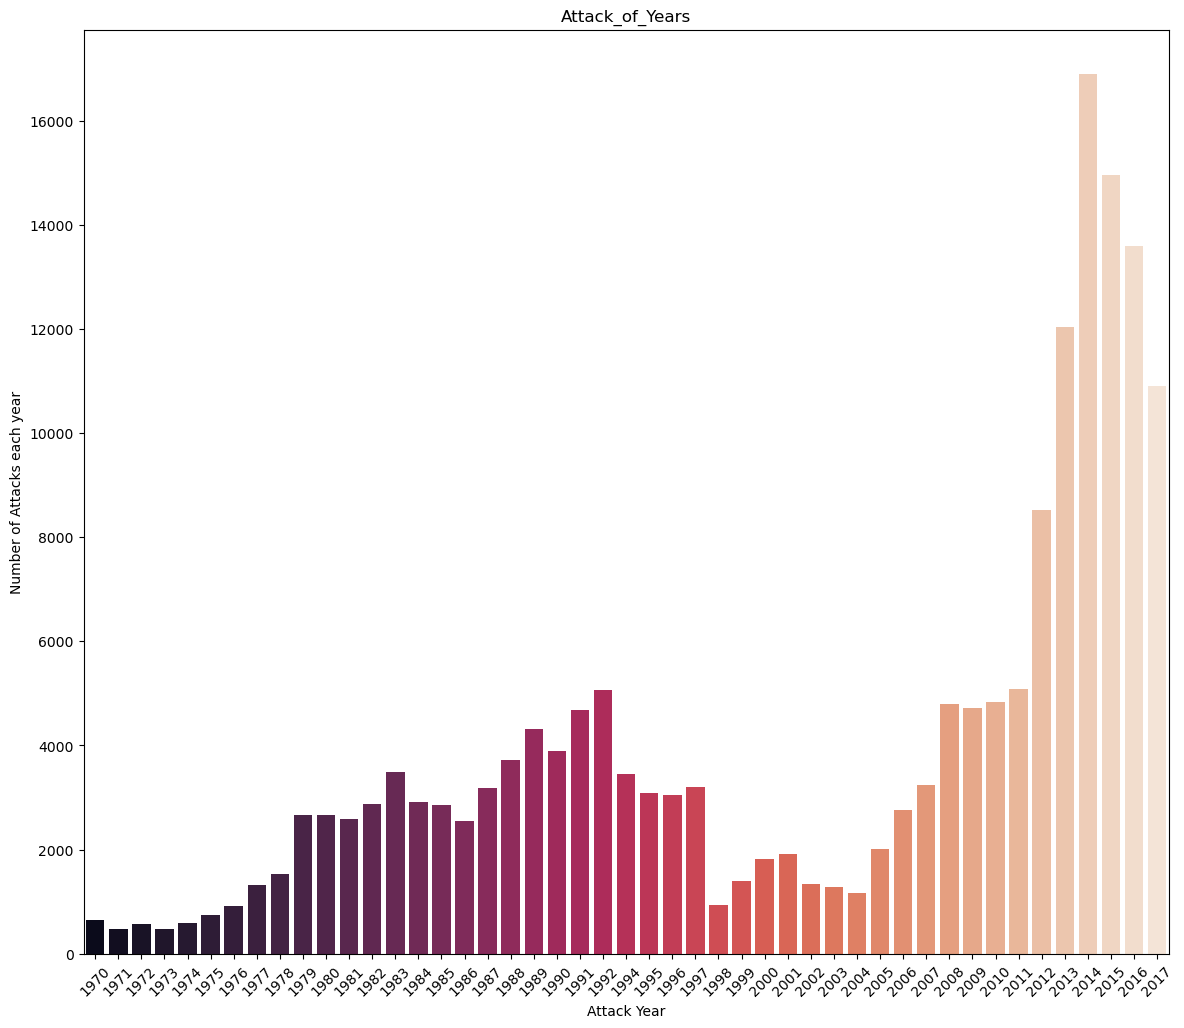

In [23]:
x_year = dataset['Year'].unique() 
y_count_years = dataset['Year'].value_counts(dropna = False).sort_index() 
plt.figure(figsize = (14,12)) 
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket') 
plt.xticks(rotation = 45) 
plt.xlabel('Attack Year') 
plt.ylabel('Number of Attacks each year') 
plt.title('Attack_of_Years') 
plt.show()

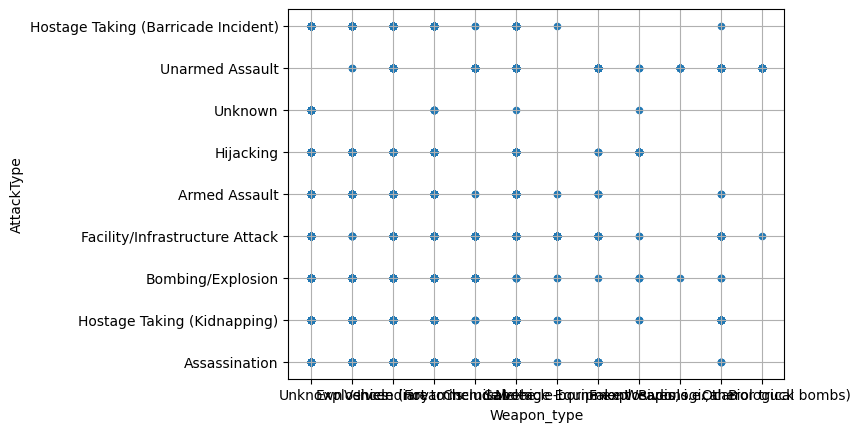

In [24]:
dataset.plot(kind ="scatter", x ='Weapon_type', y ='AttackType') 
plt.grid()

C:\Users\91761\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


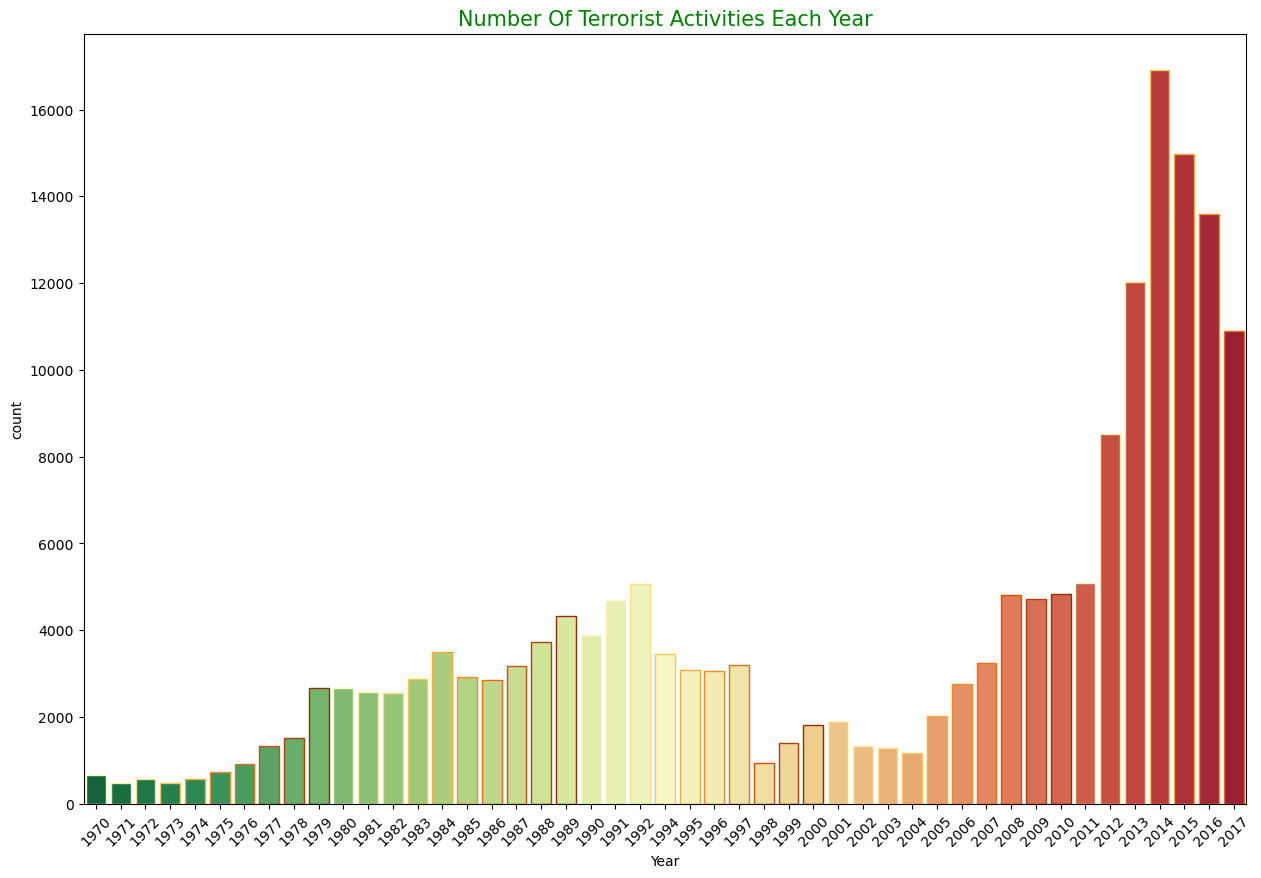

In [25]:
plt.subplots(figsize=(15,10)) 
sns.countplot('Year',data=dataset,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10)) 
plt.xticks(rotation=45) 
plt.title('Number Of Terrorist Activities Each Year',color="green",fontsize=15) 
plt.show()

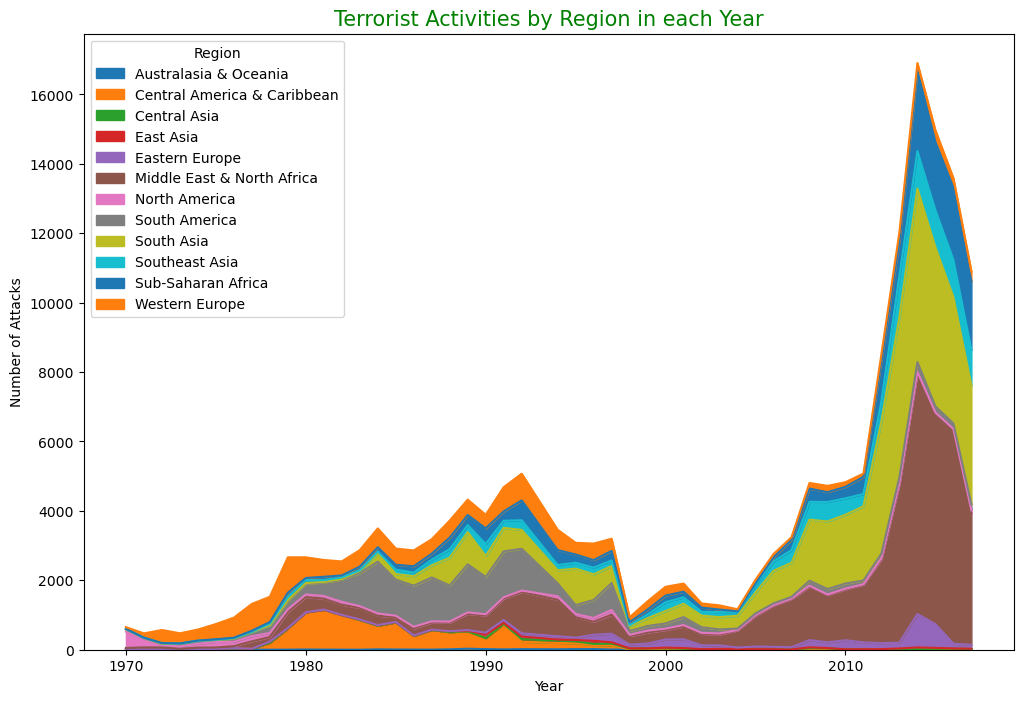

In [26]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(12,8)) 
plt.title('Terrorist Activities by Region in each Year',color="green",fontsize=15) 
plt.ylabel('Number of Attacks') 
plt.show()

In [27]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int) 
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int) 
dataset['casualities'] =dataset['Killed'] + dataset['Wounded']

# Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [28]:
terror=dataset.sort_values(by='casualities',ascending=False)[:40]

In [29]:
heat=terror.pivot_table(index='Country',columns='Year',values='casualities') 
heat.fillna(0,inplace=True)

In [30]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']] 
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale) 
data = [heatmap] 
layout = go.Layout( title='Top 40 Worst Terror Attacks in History from 1982 to 2016', xaxis = dict(ticks='', nticks=20), yaxis = dict(ticks='') ) 
fig = go.Figure(data=data, layout=layout) 
py.iplot(fig, filename='heatmap',show_link=False)

In [31]:
dataset.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

# Top Countries affected by Terror Attacks

C:\Users\91761\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



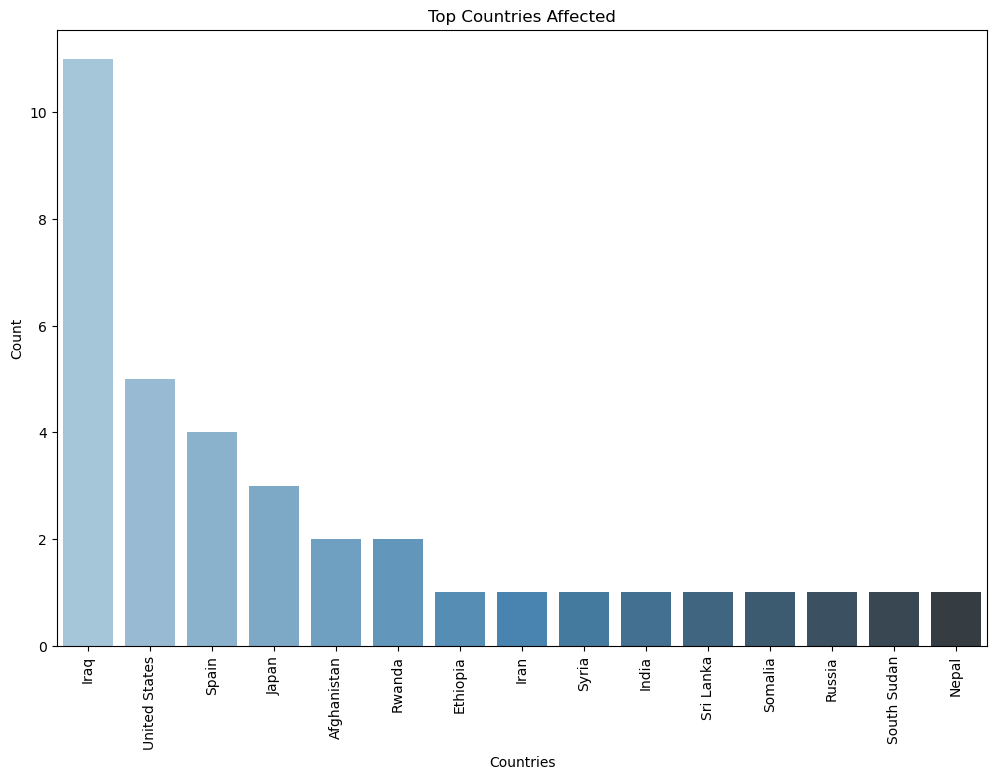

In [32]:
plt.subplots(figsize=(12,8))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d') 
plt.title('Top Countries Affected') 
plt.xlabel('Countries') 
plt.ylabel('Count') 
plt.xticks(rotation= 90) 
plt.show()

# Terrorist Attacks on a particular year and their Locations

In [33]:
import folium 
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 2008

In [34]:
filterData = terror[filterYear] 
reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()

In [35]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map) 
for point in range(0, len(reqFilterDataList)): 
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster) 
    map

In [36]:
terror.Group.value_counts()[1:15]

Islamic State of Iraq and the Levant (ISIL)                                  6
Unknown                                                                      4
Al-Qaida in Iraq                                                             3
Hutu extremists                                                              2
Aum Shinri Kyo                                                               2
Anti-Government extremists                                                   2
Sudan People's Liberation Movement in Opposition (SPLM-IO)                   1
Jihadi-inspired extremists                                                   1
Al-Shabaab                                                                   1
Riyadus-Salikhin Reconnaissance and Sabotage Battalion of Chechen Martyrs    1
Khorasan Chapter of the Islamic State                                        1
Kata'ib Hezbollah                                                            1
Communist Party of Nepal- Maoist (CPN-M)            

In [37]:
killData = terror.loc[:,'Killed'] 
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 12795


In [38]:
attackData = terror.loc[:,'AttackType'] 
typeKillData = pd.concat([attackData, killData], axis=1)

In [39]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum') 
typeKillFormatData

AttackType,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
Killed,3385,2903,2767,344,3376,20


In [40]:
countryData = terror.loc[:,'Country'] 
countryKillData = pd.concat([countryData, killData], axis=1)

In [41]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum') 
countryKillFormatData

Country,Afghanistan,Chad,Ethiopia,France,India,Iran,Iraq,Japan,Kenya,Nepal,Russia,Rwanda,Somalia,South Sudan,Spain,Sri Lanka,Syria,Tajikistan,United States
Killed,333,160,200,87,188,60,4543,20,224,518,344,1451,588,287,191,90,517,0,2994


In [42]:
labels = countryKillFormatData.columns.tolist() 
labels = labels[:50] 
index = np.arange(len(labels)) 
transpoze = countryKillFormatData.T 
values = transpoze.values.tolist() 
values = values[:50] 
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']

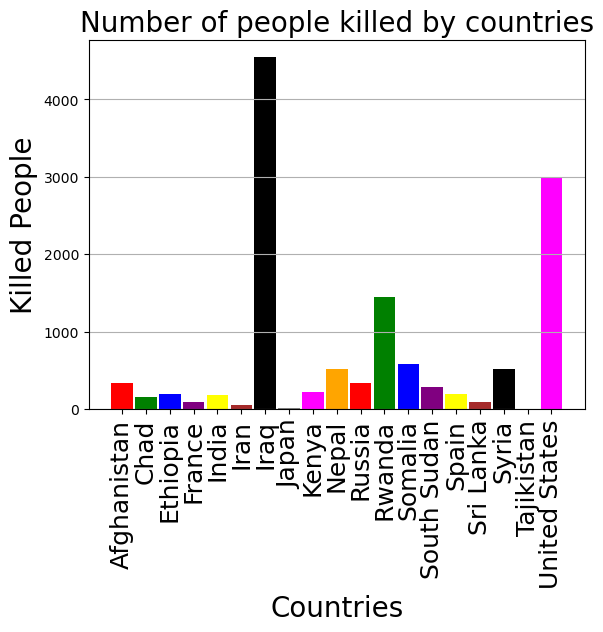

In [43]:
fig, ax = plt.subplots(1, 1) 
ax.yaxis.grid(True) 
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=25 
fig_size[1]=25 
plt.rcParams["figure.figsize"] = fig_size 
plt.bar(index, values, color = colors, width = 0.9) 
plt.ylabel('Killed People', fontsize=20) 
plt.xlabel('Countries', fontsize = 20) 
plt.xticks(index, labels, fontsize=18, rotation=90) 
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

# Conclusion


From the above graphs we can understand the number of terrorist attacks that happened all over the world and number of peoplekilled in each terrorist attacks.The Middle East and North Africa are seen to be the places of serious terrorist attacks.In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.